# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Hariish Hafiiz
- **Email:** hariishhafiiz9@gmail.com
- **ID Dicoding:** muhammad_hariish_hafiiz_8w1A

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah penyewa sepeda?
- Bagaimana pengaruh musim terhadap jumlah penyewa sepeda?
- Apa pengaruh musim terhadap penyewa sepeda berdasarkan pelanggan casual dan registered?
- Apakah terdapat perbedaan yang signifikan terhadap pengaruh hari kerja atau hari libur dengan jumlah penyewa sepeda?
- Bagaimana kinerja penjualan perusahaan selama beberapa tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

##### Input dataset day.csv

In [5]:
day_df = pd.read_csv('data/day.csv')
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


##### Input dataset hour.csv

In [6]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Berdasarkan data-data di atas, masih sulit untuk dibaca dan dipahami**

### Assessing Data

##### Menilai Dataset Day

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##### Mengecek Missing Value dari data day

In [8]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Pada dataset day, tidak terdapat missing value**

##### Mengecek Duplikasi Dari Dataset Day

In [9]:
print("Jumlah duplikat pada dataset day.csv: ", day_df.duplicated().sum())

Jumlah duplikat pada dataset day.csv:  0


**Pada dataset day tidak terdapat data yang duplikat**

In [10]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Pada hasil deskripsi data **day_df**, tidak ada hal yang mencurigakan atau aneh yang ditemukan. Semua nilai statistik yang ditampilkan, seperti rata-rata, standar deviasi, nilai minimum, maksimum, serta kuartil, terlihat normal**

##### Menilai Dataset Hour

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Pada dataset hour, tidak terdapat missing value**

In [13]:
print("Jumlah duplikat pada dataset hour.csv: ", hour_df.duplicated().sum())

Jumlah duplikat pada dataset hour.csv:  0


**Pada dataset hour juga tidak terdapat data yang duplikat**

In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Pada hasil deskripsi data **hour_df**, tidak ada hal yang mencurigakan atau aneh yang ditemukan. Semua nilai statistik yang ditampilkan, seperti rata-rata, standar deviasi, nilai minimum, maksimum, serta kuartil, terlihat normal**

**Insight:**
- Pada dataset day dan hour tidak terdapat missing value
- Pada dataset day dan hour tidak terdapat data yang duplikat
- Deskripsi dataset day dan hour terlihat normal

### Cleaning Data

**Pada cleaning data, saya akan melakukan:**
- Mengkonversi kolom `dteday` yang semula object menjadi DateTime
- Mengubah type data `season`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit` ke categorical
- Mengubah nama kolom agar mudah dipahami
- Mengkonversi isi kolom berdasarkan keterangan dari dataset di kaggle agar lebih mudah untuk dipahami

##### Mengkonversi kolom `dteday` yang semula object menjadi DateTime

In [15]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

##### Mengubah type data `season`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit` ke categorical

In [16]:
categorical_columns = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for column in categorical_columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

##### Mengubah nama kolom dari data day_df

In [17]:
day_df.rename(columns={
    'instant': 'record_id',
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'holiday': 'holiday',
    'weekday': 'day_of_week',
    'workingday': 'is_working_day',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'atemp': 'feels_like_temperature',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'casual': 'casual_users',
    'registered': 'registered_users',
    'cnt': 'total_users'
}, inplace=True)

##### Mengubah nama kolom dari data hour_df

In [18]:
hour_df.rename(columns={
    'instant': 'record_id',
    'dteday': 'date',
    'season': 'season',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'holiday': 'holiday',
    'weekday': 'day_of_week',
    'workingday': 'is_working_day',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'atemp': 'feels_like_temperature',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'casual': 'casual_users',
    'registered': 'registered_users',
    'cnt': 'total_users'
}, inplace=True)

##### Konversi `season` dengan meng-assign:
1 = Spring
2 = Summer
3 = Fall
4 = Winter

In [19]:
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

##### Konversi month dengan mengubah format angka menjadi nama bulan

In [20]:
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

##### Konversi weather condition dengan mengubah format angka menjadi nama weather

In [21]:
day_df.weather_condition.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
hour_df.weather_condition.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

##### Konversi day_of_week dengan mengubah format angka menjadi nama-nama hari

In [22]:
day_df.day_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.day_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

##### Konversi year yang awalnya, 0 menjadi 2011 dan 1 menjadi 2012

In [23]:
day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

##### Konversi value humidity dengan dikalikan dengan 100

In [24]:
day_df['humidity'] = day_df['humidity']*100
hour_df['humidity'] = hour_df['humidity']*100

##### Membuat kolom baru bernama category_days yang menunjukan isi kolom tersebut weekend atau weekdays

In [25]:
day_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_days(day_of_week):
    if day_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else: 
        return "weekdays"

hour_df["category_days"] = hour_df["day_of_week"].apply(get_category_days)
day_df["category_days"] = day_df["day_of_week"].apply(get_category_days)

In [26]:
day_df.head()

,record_id,date,season,year,month,holiday,day_of_week,is_working_day,weather_condition,temperature,feels_like_temperature,humidity,wind_speed,casual_users,registered_users,total_users,category_days
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,0,Misty,0.344167,0.363625,80.5833,0.160446,331,654,985,weekend
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,0,Misty,0.363478,0.353739,69.6087,0.248539,131,670,801,weekend
2,3,2011-01-03,Spring,2011,Jan,0,Monday,1,Clear,0.196364,0.189405,43.7273,0.248309,120,1229,1349,weekdays
3,4,2011-01-04,Spring,2011,Jan,0,Tuesday,1,Clear,0.200000,0.212122,59.0435,0.160296,108,1454,1562,weekdays
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,1,Clear,0.226957,0.229270,43.6957,0.186900,82,1518,1600,weekdays


In [27]:
hour_df.head()

,record_id,date,season,year,month,hour,holiday,day_of_week,is_working_day,weather_condition,temperature,feels_like_temperature,humidity,wind_speed,casual_users,registered_users,total_users,category_days
0,1,2011-01-01,Spring,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,81.0,0.0,3,13,16,weekend
1,2,2011-01-01,Spring,2011,Jan,1,0,Saturday,0,Clear,0.22,0.2727,80.0,0.0,8,32,40,weekend
2,3,2011-01-01,Spring,2011,Jan,2,0,Saturday,0,Clear,0.22,0.2727,80.0,0.0,5,27,32,weekend
3,4,2011-01-01,Spring,2011,Jan,3,0,Saturday,0,Clear,0.24,0.2879,75.0,0.0,3,10,13,weekend
4,5,2011-01-01,Spring,2011,Jan,4,0,Saturday,0,Clear,0.24,0.2879,75.0,0.0,0,1,1,weekend


**Pada bagian Cleaning data, kita sudah dapat memahami datanya lebih jelas. Dapat dilihat output dari dataset day_df dan hour_df lebih mudah untuk dibaca dan dipahami**

### Menyimpan day dan hour yang sudah di cleaning

In [28]:
day_df.to_csv("day_clean.csv", index=False)

In [31]:
hour_df.to_csv("hour_clean.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore day_df

In [32]:
hour_df.describe(include='all')

C:\Users\asus\AppData\Local\Temp\ipykernel_16772\2781978731.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include='all')


,record_id,date,season,year,month,hour,holiday,day_of_week,is_working_day,weather_condition,temperature,feels_like_temperature,humidity,wind_speed,casual_users,registered_users,total_users,category_days
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,731,4,2,12,NaN,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,2011-01-01 00:00:00,Fall,2012,May,NaN,0.0,Saturday,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays
freq,NaN,24,4496,8734,1488,NaN,16879.0,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN
std,5017.0295,NaN,NaN,NaN,NaN,6.914405,NaN,NaN,NaN,NaN,0.192556,0.171850,19.292983,0.122340,49.305030,151.357286,181.387599,NaN
min,1.0000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN


**Berdasarkan hasil tersebut, dapat diketahui bahwa informasi jumlah penyewa sebanyak 17379. Berdasarkan data yang ditampilkan range antara jam 00.00 sampai 23.59, memilliki rata-rata penyewaan sepeda terjadi pada jam 11.54 dengan standar deviasinya sebesar 6.91**

In [33]:
hour_df.groupby(by="hour").total_users.sum().sort_values(ascending=False).reset_index().head(10)

,hour,total_users
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789
5,13,184919
6,12,184414
7,15,183149
8,14,175652
9,20,164550


**Jam yang paling ramai terhadap penyewaan sepeda adalah sekitar jam 17.00**

In [34]:
hour_df.groupby(by="hour").total_users.sum().sort_values(ascending=True).reset_index().head(10)

,hour,total_users
0,4,4428
1,3,8174
2,5,14261
3,2,16352
4,1,24164
5,0,39130
6,6,55132
7,23,63941
8,22,95612
9,21,125445


**Jam yang paling sepi terhadap penyewaan sepeda adalah sekitar jam 04.00**

In [35]:
day_df.describe(include="all")

C:\Users\asus\AppData\Local\Temp\ipykernel_16772\282069457.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,record_id,date,season,year,month,holiday,day_of_week,is_working_day,weather_condition,temperature,feels_like_temperature,humidity,wind_speed,casual_users,registered_users,total_users,category_days
count,731.000000,731,731,731,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,731,4,2,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,2011-01-01 00:00:00,Fall,2012,Jan,0.0,Sunday,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays
freq,NaN,1,188,366,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN
std,211.165812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,14.242910,0.077498,686.622488,1560.256377,1937.211452,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN


##### Melihat cuaca yang paling berpengaruh terhadap jumlah penyewaan sepeda

In [36]:
day_df.groupby(by="weather_condition").total_users.sum().sort_values(ascending=False).reset_index().head(10)

,weather_condition,total_users
0,Clear,2257952
1,Misty,996858
2,Light_rainsnow,37869


**Berdasarkan data di atas, jumlah pengguna sepeda cenderung menggunakan sepeda saat cuacanya clear (cerah atau sedikit berawan) dan paling sepi ketika cuaca light rainsow**

##### Melihat season yang paling berpengaruh terhadap jumlah penyewaan sepeda

In [37]:
day_df.groupby(by="season").total_users.sum().sort_values(ascending=False).reset_index().head(10)

,season,total_users
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


**Berdasarkan data di atas, season yang paling ramai terhadap jumlah penyewa sepeda adalah pada season Fall**

##### Melihat pengaruh cuaca terhadap jumlah casual dan register penyewa

In [38]:
day_df.groupby(by="season")[['casual_users', 'registered_users']].sum()

,casual_users,registered_users
season,,
Spring,60622,410726
Summer,203522,715067
Fall,226091,835038
Winter,129782,711831


**Berdasarkan data di atas, season fall tetap yang paling ramai terhadap jumlah penyewa sepeda, baik itu pada casual penyewa maupun register penyewa**

In [39]:
day_df.groupby(by="year").agg({
    "registered_users": ["sum"],
    "casual_users": ["sum"]
})

,registered_users,casual_users
,sum,sum
year,,
2011,995851,247252
2012,1676811,372765


**Berdasarkan data diatas, registered dengan casual users memiliki gap jumlah penyewa yang cukup jauh, jumlah penyewa registered pada tahun 2011 sebanyak 995851 sedangkan jumlah penyewa casual sebanyak 247252. Kemudian jumlah penyewa sepeda dari tahun 2011 ke 2012 terdapat peningkatan jumlah penyewa sepeda**

In [40]:
day_df.groupby(by="day_of_week").agg({
    "date": "nunique",
    "casual_users": "sum",
    "registered_users": "sum",
    "total_users": ["max", "min", "mean", "sum"]
}).sort_values(by=("total_users", "sum"), ascending=False).reset_index()

day_of_week    date casual_users registered_users total_users        \
              nunique          sum              sum         max   min   
0      Friday     104        78238           409552        8362  1167   
1    Thursday     104        61460           423935        7804   431   
2    Saturday     105       153852           323955        8714   627   
3   Wednesday     104        57319           415729        8173   441   
4     Tuesday     104        57843           411266        7767   683   
5      Monday     105        70784           384719        7525    22   
6      Sunday     105       140521           303506        8227   605   

                        
          mean     sum  
0  4690.288462  487790  
1  4667.259615  485395  
2  4550.542857  477807  
3  4548.538462  473048  
4  4510.663462  469109  
5  4338.123810  455503  
6  4228.828571  444027

**Hari yang paling ramai penyewa sepeda berada di hari Jumat, dengan rata-rata penyewa sepeda di hari jumat adalah 4690 penyewa dan maksimum penyewa sepeda dalam satu hari di hari jumat adalah 8362 penyewa serta yang paling sedikit penyewa dalam satu hari di hari jumat adalah 1167 penyewa**

### Explore hour_df

In [41]:
hour_df.describe(include="all")

C:\Users\asus\AppData\Local\Temp\ipykernel_16772\1264340832.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,record_id,date,season,year,month,hour,holiday,day_of_week,is_working_day,weather_condition,temperature,feels_like_temperature,humidity,wind_speed,casual_users,registered_users,total_users,category_days
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,731,4,2,12,NaN,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,2011-01-01 00:00:00,Fall,2012,May,NaN,0.0,Saturday,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays
freq,NaN,24,4496,8734,1488,NaN,16879.0,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN
std,5017.0295,NaN,NaN,NaN,NaN,6.914405,NaN,NaN,NaN,NaN,0.192556,0.171850,19.292983,0.122340,49.305030,151.357286,181.387599,NaN
min,1.0000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN


In [42]:
hour_df.groupby(by=["category_days", "hour"]).agg({
    "date": "nunique",
    "casual_users": "sum",
    "registered_users": "sum",
    "total_users": ["max", "min", "mean", "sum"]
})

date casual_users registered_users total_users      \
                   nunique          sum              sum         max min   
category_days hour                                                         
weekdays      0        517         3850            15603         283   2   
              1        515         2024             6970         123   1   
              2        508         1206             3558          93   1   
              3        488          487             2045          36   1   
              4        490          396             2273          17   1   
              5        516          662            11893          66   1   
              6        517         2216            49218         213   4   
              7        517         6227           139642         596   6   
              8        517        11539           228637         839  11   
              9        517        12982           110406         426  23   
              10       517        16982            54433         447   8   
              11       517        20536            63165         485  10   
              12       518        22641            83197         543   3   
              13       519        23405            81682         566  11   
              14       519        25031            72400         651  12   
              15       519        24932            80899         601  13   
              16       520        25952           126034         634  13   
              17       520        29972           238304         976  26   
              18       519        26387           224386         977  26   
              19       519        21457           156704         743  18   
              20       519        16589           111508         567  23   
              21       519        13015            82803         584   6   
              22       519        10286            60918         502  11   
              23       519         6870            38523         256   2   
weekend       0        209         3525            16152         249   6   
              1        209         2685            12485         168   4   
              2        207         2206             9382         132   2   
              3        209         1406             4236          79   2   
              4        207          478             1281          28   1   
              5        201          350             1356          55   1   
              6        208          801             2897          97   1   
              7        210         1810             6492         102   1   
              8        210         4222            16603         244   5   
              9        210         9476            26574         395  14   
              10       210        16807            38035         539  12   
              11       210        22750            44869         663  27   
              12       210        27077            51499         776  32   
              13       210        29308            50524         760  30   
              14       210        30058            48163         750  23   
              15       210        29674            47644         750   7   
              16       210        27882            47880         783  11   
              17       210        24248            44336         731  15   
              18       209        18109            40890         645  23   
              19       209        14048            34580         554  11   
              20       209         9789            26664         399  11   
              21       209         7555            22072         345   7   
              22       209         5914            18494         338   9   
              23       209         4195            14353         239   6   

                                        
                          mean     sum  
category_days hour                      
weekdays      0      3

**On weekends or holidays, the most users are at 13.00 with a total of 86,101 users. While on weekdays, the most users are at 17.00 with a total of 262,120 users.**
**Di hari weekdays, kebanyakan penyewa sepeda menyewa disekitar jam 17.00 dengan total penyewa 268276. Sedangkan, di hari weekend kebanyakan penyewa sepeda menyewa sepeda disekitar jam 13.00 dengan total penyewa 79832**

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah penyewa sepeda?

C:\Users\asus\AppData\Local\Temp\ipykernel_16772\2260158857.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


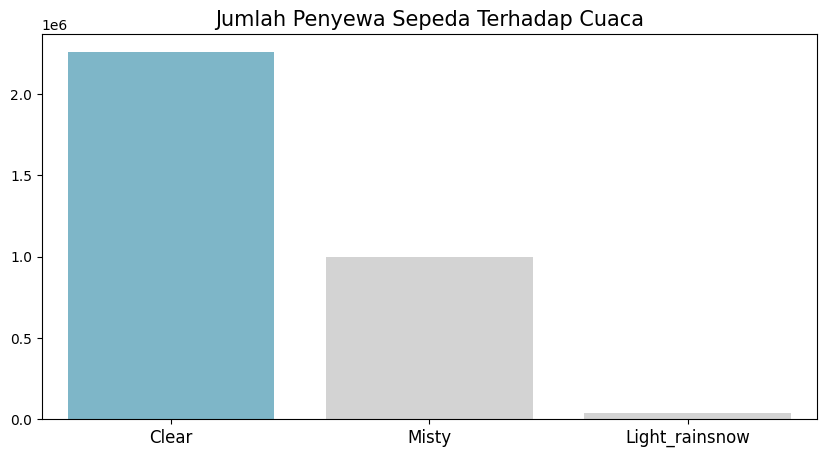

In [43]:
weather_usage = day_df.groupby(by="weather_condition").total_users.sum().reset_index()
weather_usage.rename(columns={"total_users": "total_users_count"}, inplace=True)
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))
sns.barplot(
    x="weather_condition", 
    y="total_users_count", 
    data=weather_usage.sort_values(by="total_users_count", ascending=False),
    palette=colors
)

plt.title("Jumlah Penyewa Sepeda Terhadap Cuaca", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)

plt.show()


**Berdasarkan data yang ditampilkan pada grafik di atas, terlihat bahwa kondisi cuaca sangat mempengaruhi jumlah penyewa sepeda. Cuaca Clear (cerah) memiliki jumlah penyewa sepeda tertinggi, dengan lebih dari 2 juta penyewa. Sedangkan, ketika cuaca dalam kondisi Misty (berkabut), jumlah penyewa sepeda menurun secara signifikan, dengan jumlah pengguna sekitar setengah dari cuaca cerah. Bahkan, saat cuaca Light Rain/Snow (hujan ringan atau salju), jumlah penyewa sepeda sangat rendah, hampir mendekati nol. Maka dari itu dapat disimpulkan bahwa cuaca memiliki pengaruh yang signifikan terhadap jumlah penyewa sepeda**

### Pertanyaan 2: Bagaimana pengaruh musim terhadap jumlah penyewa sepeda?

C:\Users\asus\AppData\Local\Temp\ipykernel_16772\3525486644.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


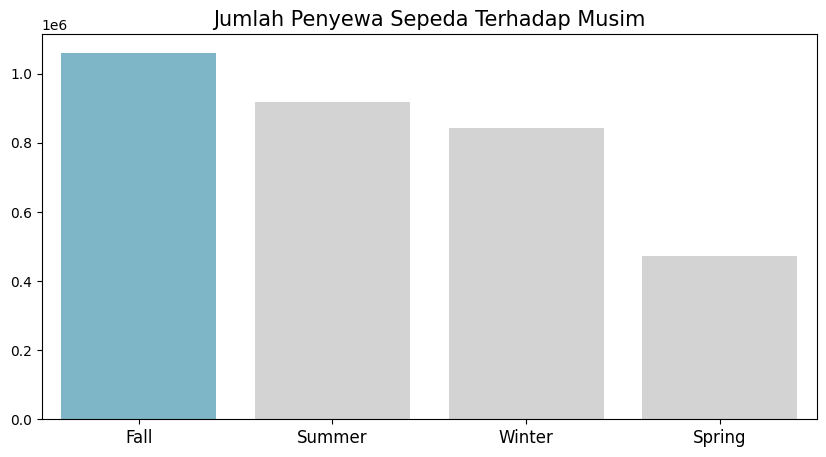

In [44]:
season_usage = day_df.groupby(by="season").total_users.sum().reset_index()
season_usage.rename(columns={"total_users": "total_users_count"}, inplace=True)
season_usage_sorted = season_usage.sort_values(by="total_users_count", ascending=False)
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))

sns.barplot(
    x="season", 
    y="total_users_count", 
    data=season_usage_sorted,
    palette=colors,
    order=season_usage_sorted['season']
)

plt.title("Jumlah Penyewa Sepeda Terhadap Musim", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)

plt.show()

**Grafik di atas menunjukkan bahwa jumlah penyewa sepeda tertinggi terjadi pada musim Fall, dengan lebih dari 1 juta pengguna. Musim Summer dan Winter juga memiliki jumlah penyewa sepeda yang tinggi, meskipun sedikit lebih rendah dari Fall. Sedangkan, musim Spring memiliki jumlah penyewa paling sedikit, di bawah 600.000. Maka dapat disimpulkan bahwa musim Fall merupakan musim yang paling banyak jumlah penyewa sepeda, dan musim spring merupakan musim yang paling sedikit jumlah penyewa sepeda**

### Pertanyaan 3: Apa pengaruh musim terhadap penyewa sepeda berdasarkan pelanggan casual dan registered?

C:\Users\asus\AppData\Local\Temp\ipykernel_16772\1006255777.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\asus\AppData\Local\Temp\ipykernel_16772\1006255777.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


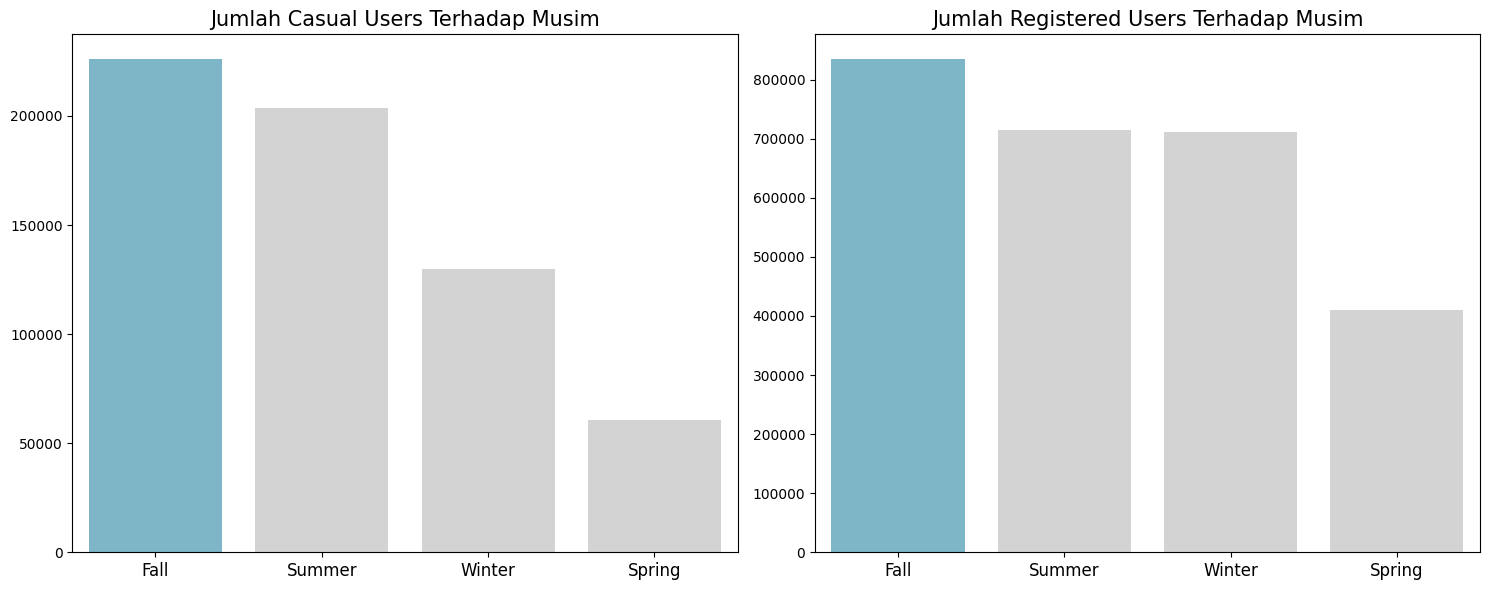

In [45]:
season_usage = day_df.groupby(by="season")[['casual_users', 'registered_users']].sum().reset_index()
season_usage.rename(columns={"casual_users": "casual_users_count", "registered_users": "registered_users_count"}, inplace=True)
casual_sorted = season_usage.sort_values(by="casual_users_count", ascending=False)
registered_sorted = season_usage.sort_values(by="registered_users_count", ascending=False)
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(
    x="season", 
    y="casual_users_count", 
    data=season_usage,
    palette=colors,
    order=casual_sorted['season'],
    ax=ax[0]
)
ax[0].set_title("Jumlah Casual Users Terhadap Musim", loc="center", fontsize=15)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='x', labelsize=12)

sns.barplot(
    x="season", 
    y="registered_users_count", 
    data=season_usage,
    palette=colors,
    order=registered_sorted['season'],
    ax=ax[1]
)
ax[1].set_title("Jumlah Registered Users Terhadap Musim", loc="center", fontsize=15)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='x', labelsize=12)

plt.tight_layout()
plt.show()


**Grafik di atas menunjukkan pengaruh musim terhadap casual users dan registered users terkait dengan jumlah penyewa sepeda berdasarkan musim**

- Pada kedua kelompok, musim Fall merupakan musim dengan jumlah penyewa tertinggi, baik untuk penyewa casual maupun penyewa registered
- Musim Summer juga menunjukkan jumlah penyewa yang tinggi di kedua kategori, meskipun sedikit lebih rendah dibandingkan musim Fall
- Musim Winter menunjukkan penurunan yang lebih signifikan untuk penyewa casual, namun jumlah penyewa registered tetap cukup tinggi
- Musim Spring memiliki jumlah penyewa terendah di kedua kategori, menunjukkan bahwa musim ini kurang diminati oleh penyewa sepeda, baik yang casual maupun yang registered

### Pertanyaan 4: Apakah terdapat perbedaan yang signifikan terhadap pengaruh hari kerja atau hari libur dengan jumlah penyewa sepeda?

C:\Users\asus\AppData\Local\Temp\ipykernel_16772\857908215.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="category_days", y="total_users_count", data=category_usage.sort_values(by="total_users_count", ascending=False), palette=colors)


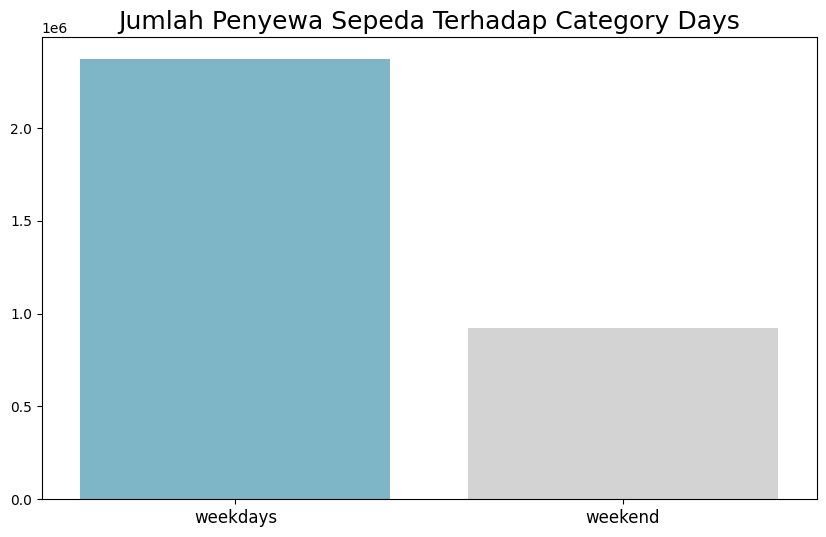

In [46]:
category_usage = day_df.groupby(by="category_days")['total_users'].sum().reset_index()
category_usage.rename(columns={"total_users": "total_users_count"}, inplace=True)

plt.figure(figsize=(10, 6))

colors = ["#72BCD4", "#D3D3D3"]

sns.barplot(x="category_days", y="total_users_count", data=category_usage.sort_values(by="total_users_count", ascending=False), palette=colors)

plt.title("Jumlah Penyewa Sepeda Terhadap Category Days", loc="center", fontsize=18)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)

plt.show()

**Berdasarkan grafik di atas, terlihat bahwa jumlah penyewa sepeda jauh lebih tinggi pada **hari kerja (weekdays)** dibandingkan dengan **akhir pekan (weekend)**. Jumlah penyewa sepeda pada hari kerja mencapai lebih dari 2 juta pengguna, sementara pada akhir pekan, jumlah penyewa kurang dari setengahnya. Maka dari itu, hari kerja memiliki pengaruh yang lebih besar terhadap penggunaan sepeda dibandingkan dengan akhir pekan.**

### Pertanyaan 5: Bagaimana kinerja penyewaan sepeda selama beberapa tahun terakhir?

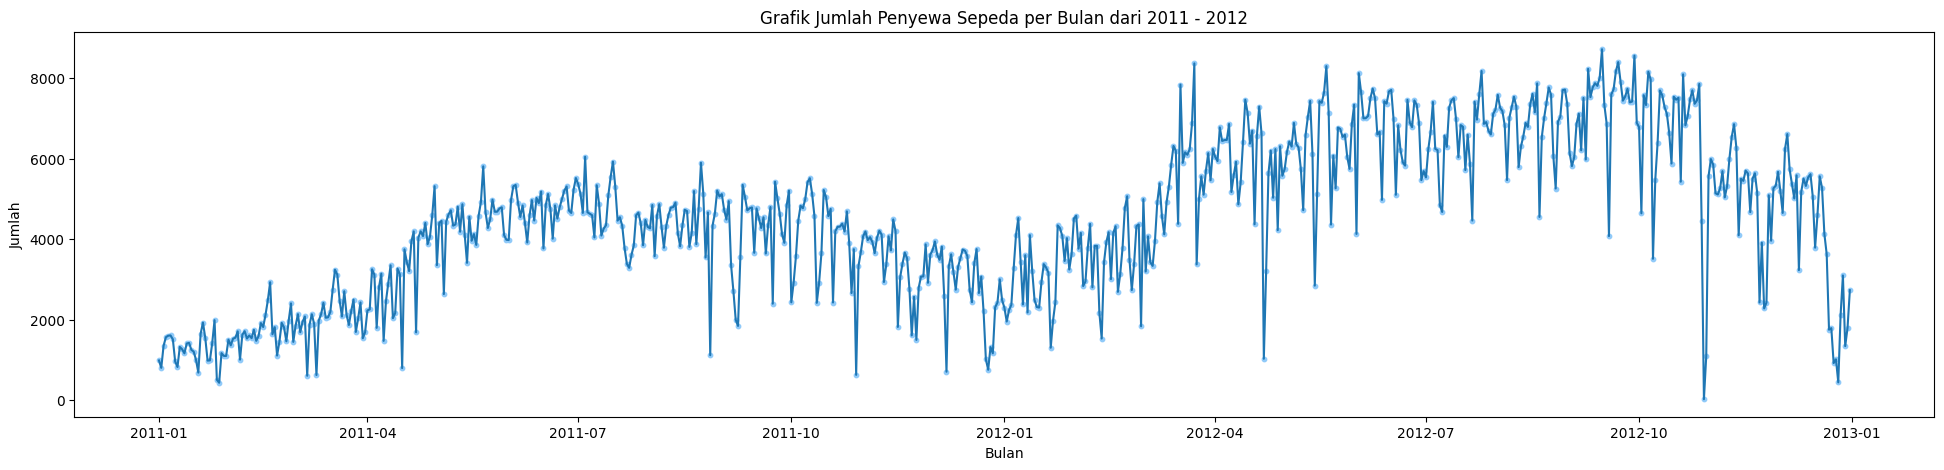

In [47]:
plt.figure(figsize=(24, 5))

monthly_counts = day_df['total_users'].groupby(day_df['date']).max()

plt.scatter(monthly_counts.index, monthly_counts.values, c="#90CAF9", s=10, marker='o')
plt.plot(monthly_counts.index, monthly_counts.values)
plt.xlabel('Bulan')
plt.ylabel('Jumlah')

plt.title('Grafik Jumlah Penyewa Sepeda per Bulan dari 2011 - 2012')

plt.show()

**Berdasarkan grafik di atas tren penyewa sepeda meningkat dari awal 2011 hingga pertengahan 2012, terutama selama musim Summer dan Fall. Namun, musim Winter menunjukkan penurunan yang signifikan. Setelah mencapai puncaknya di September 2012, jumlah penyewa mulai berkurang secara signifikan menjelang akhir tahun 2012 pada bulan November dan Desember**

## Conclusion

1. Bagaimana pengaruh cuaca terhadap jumlah penyewa sepeda?
2. Bagaimana pengaruh musim terhadap jumlah penyewa sepeda?
3. Apa pengaruh musim terhadap penyewa sepeda berdasarkan pelanggan casual dan registered?
4. Apakah terdapat perbedaan yang signifikan terhadap pengaruh hari kerja atau hari libur dengan jumlah penyewa sepeda?
5. Bagaimana kinerja penjualan perusahaan selama beberapa tahun terakhir?

- Conclution pertanyaan 1: Cuaca memiliki pengaruh signifikan terhadap jumlah penyewa sepeda. Berdasarkan data, kondisi cuaca Clear (cerah) memiliki jumlah penyewa tertinggi dibanding dengan kondisi cuaca lainnya
- Conclution pertanyaan 2: Musim memiliki pengaruh signifikan terhadap jumlah penyewa sepeda. Berdasarkan data, kondisi musim Fall memiliki jumlah penyewa tertinggi dibanding dengan kondisi cuaca lainnya
- Conclution pertanyaan 3: Baik casual users  maupun registered users menunjukkan pola serupa dalam penggunaan sepeda berdasarkan musim. Musim Fall adalah yang paling banyak jumlah penyewa sepeda di kedua kelompok, sementara musim Spring memiliki jumlah penyewa terendah. Namun, pengguna registered cenderung lebih stabil jumlahnya sepanjang tahun, sedangkan penyewa casual lebih dipengaruhi oleh musim, terutama dengan penurunan tajam di musim Winter
- Conclution pertanyaan 4: Terdapat perbedaan yang signifikan antara hari kerja dan hari libur dalam hal jumlah penyewa sepeda. Hari kerja (weekdays) memiliki jumlah penyewa yang jauh lebih tinggi dibandingkan dengan akhir pekan (weekend)
- Conclution pertanyaan 5: Berdasarkan tren jumlah penyewaan sepeda selama periode 2011 hingga 2012, terlihat bahwa penyewa sepeda terus meningkat sepanjang waktu, dengan puncak penyewaan terjadi pada bulan September 2012. Namun, terdapat penurunan signifikan dalam jumlah penyewaan selama bulan November dan Desember 2012, kemungkinan karena faktor cuaca. Maka, dapat disimpulkan bahwa kinerja penjualan perusahaan meningkat secara stabil hingga mencapai puncaknya pada pertengahan 2012, sebelum mengalami penurunan menjelang akhir tahun 2012.

## Analisis Lanjutan

### Clustering Analysis

In [48]:
day_df.groupby(by="weather_condition").total_users.nunique().sort_values(ascending=False)

weather_condition
Clear             451
Misty             243
Light_rainsnow     21
Name: total_users, dtype: int64

**Pada tahap sebelumnya, saya sudah mengelompokkan kolom dataset seperti keterangan pada dataset kaggle. Ini merupakan salah satu contoh Clustering yang sudah saya buat, yang awalnya berupa angka menjadi nama weathernya**

### RFM Analysis

RFM Analysis di bawah ini digunakan untuk memahami perilaku pengguna sepeda berdasarkan tiga faktor utama:

- Recency (seberapa baru pengguna sepeda terakhir kali menyewa pada hari tertentu dalam seminggu)
- Frequency (berapa kali pengguna menyewa sepeda pada hari tertentu dalam seminggu)
- Monetary (jumlah total penyewaan sepeda yang terjadi pada hari tertentu dalam seminggu)

In [53]:
current_date = day_df['date'].max()

rfm_df = day_df.groupby('day_of_week', as_index=False).agg({
    'date': lambda x: (current_date - x.max()).days,  
    'record_id': 'count',  
    'total_users': 'sum'  
})

rfm_df.columns = ['day_of_week', 'Recency', 'Frequency', 'Monetary']

rfm_df


,day_of_week,Recency,Frequency,Monetary
0,Sunday,1,105,444027
1,Monday,0,105,455503
2,Tuesday,6,104,469109
3,Wednesday,5,104,473048
4,Thursday,4,104,485395
5,Friday,3,104,487790
6,Saturday,2,105,477807


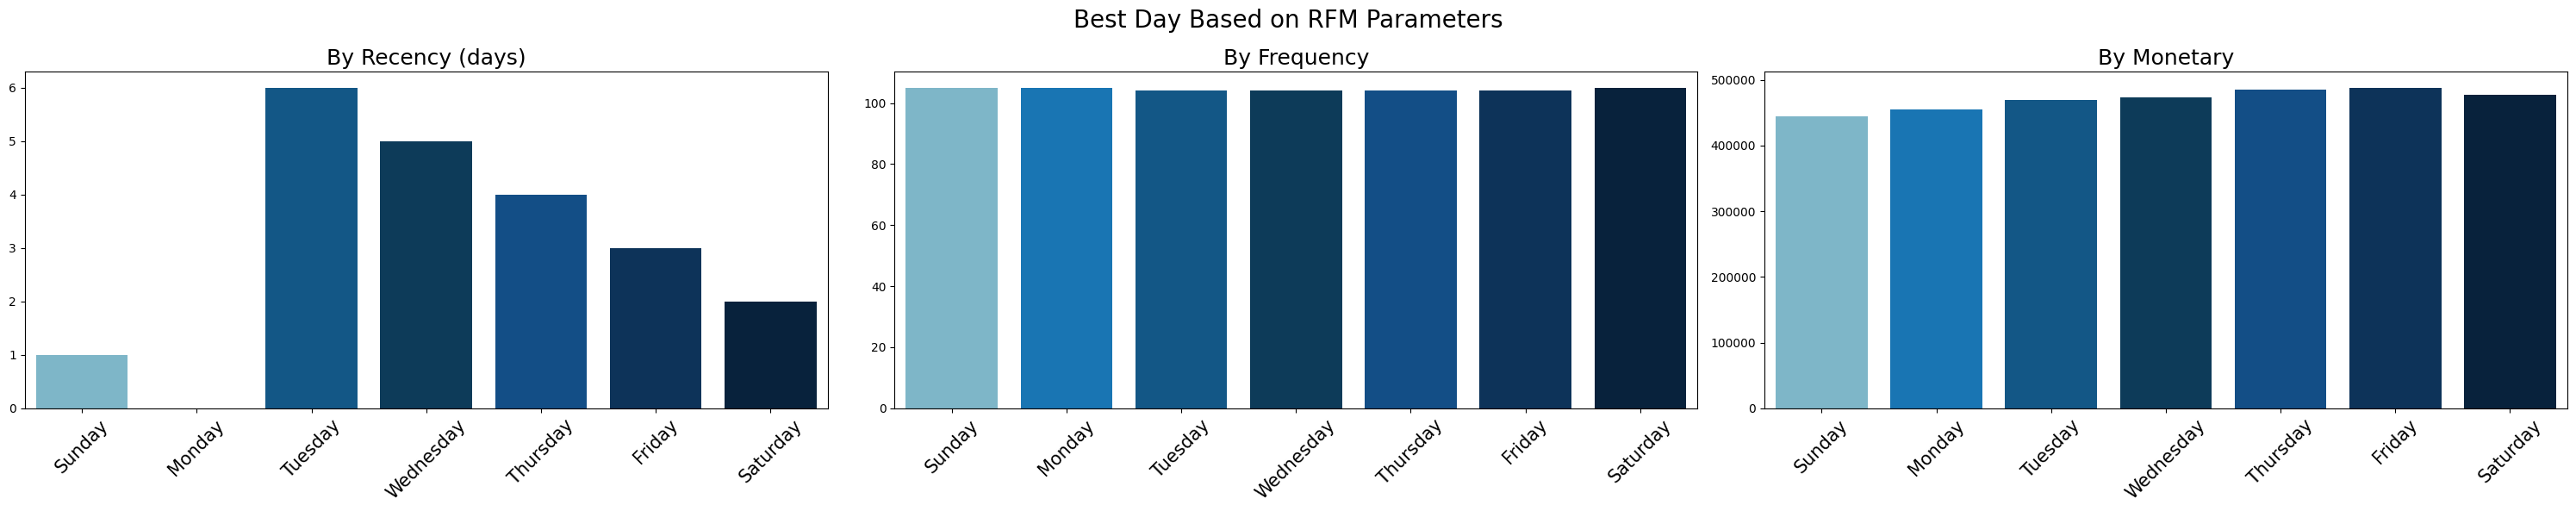

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#007ACC", "#005B99", "#003E66", "#004F99", "#003366", "#002244"]

sns.barplot(y="Recency", x="day_of_week", data=rfm_df.sort_values(by="Recency", ascending=True).head(7), palette=colors, hue="day_of_week", ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(y="Frequency", x="day_of_week", data=rfm_df.sort_values(by="Frequency", ascending=False).head(7), palette=colors, hue="day_of_week", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="Monetary", x="day_of_week", data=rfm_df.sort_values(by="Monetary", ascending=False).head(7), palette=colors, hue="day_of_week", ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

ax[0].tick_params(axis='x', labelrotation=45)
ax[1].tick_params(axis='x', labelrotation=45)
ax[2].tick_params(axis='x', labelrotation=45)

plt.suptitle("Best Day Based on RFM Parameters", fontsize=20)
plt.tight_layout()
plt.show()